In [12]:
#MAKING THE BRAIN TUMOR MODEL WITH INCEPTION V3 PRETRAINED MODEL

#Importing libraries
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D
from tensorflow.keras import Model
import PIL

In [27]:
#Pretrained model
from tensorflow.keras.applications.inception_v3 import InceptionV3

path_inception = "D:/bcd/data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
local_weights_file = path_inception
pre_trained_model = InceptionV3(input_shape = (240, 240, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

In [28]:
#Locking the weights and parameters of pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

#Getting desired layer output
last_layer = pre_trained_model.get_layer('mixed8')
last = last_layer.output
print('Last layer output shape : ', last.shape)

Last layer output shape :  (?, 6, 6, 1280)


In [29]:
#Building own model on top of trained network
x = Conv2D(500, (1,1), activation = 'relu')(last)
x = Flatten()(x)
x = Dense(1028, activation = 'relu')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(4, activation = 'softmax')(x)

#Compiling model
classifier = Model(inputs = pre_trained_model.input, outputs = x, name = 'Predict')
opt1 = Adam(learning_rate = 0.001)
opt2 = RMSprop(learning_rate = 0.001)
classifier.compile(optimizer = opt1 , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
#Summary of model
classifier.summary()

#FEEDING DATA INTO THE MODEL
from tensorflow.keras.preprocessing.image import ImageDataGenerator #A tool that allows us to augment and process data to be fed into a CNN

#class for training set
train_data = ImageDataGenerator(rescale = 1./255, #pixel values rescaled so that it stays between 0 and 1.
                                shear_range = 0.2, #this and the next 4 steps are used to augment our data by shearing it, flipping and zooming it to produce more examples per image.
                                zoom_range = 0.2,  #Data augmentation allows us to prevent overfitting of data into the training set.
                                horizontal_flip = True,
                                vertical_flip = True,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                fill_mode = 'nearest'
                                )

Model: "Predict"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 240, 240, 3) 0                                            
__________________________________________________________________________________________________
conv2d_191 (Conv2D)             (None, 119, 119, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 119, 119, 32) 96          conv2d_191[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 119, 119, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [32]:
train_set = train_data.flow_from_directory('D:/bcd/data/trainingImages', #Image path
                                           target_size = (240,240), #The shape which we want to input our images in our model
                                           batch_size = 20,         #The batch size in mini batch gradient descent
                                           class_mode = 'categorical')   


test_set = test_data.flow_from_directory('D:/bcd/data/validationImages',
                                         target_size = (240,240),
                                         batch_size = 50,
                                         class_mode = 'categorical')

Found 962 images belonging to 4 classes.
Found 500 images belonging to 4 classes.


In [33]:
#Fitting the images to the model
history = classifier.fit_generator(train_set,
                         steps_per_epoch = int(962/20),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 5)
                         #callbacks = [callbacks]

Epoch 1/20
48/48 [==============================] - 178s 4s/step - loss: 1.8397 - acc: 0.4522 - val_loss: 1.0084 - val_acc: 0.5160
Epoch 2/20
48/48 [==============================] - 212s 4s/step - loss: 0.4175 - acc: 0.8450 - val_loss: 1.2345 - val_acc: 0.5880
Epoch 3/20
48/48 [==============================] - 197s 4s/step - loss: 0.3041 - acc: 0.8907 - val_loss: 1.0460 - val_acc: 0.6160
Epoch 4/20
48/48 [==============================] - 153s 3s/step - loss: 0.3059 - acc: 0.9108 - val_loss: 1.1929 - val_acc: 0.6160
Epoch 5/20
48/48 [==============================] - 160s 3s/step - loss: 0.2249 - acc: 0.9292 - val_loss: 1.5924 - val_acc: 0.5400
Epoch 6/20
48/48 [==============================] - 164s 3s/step - loss: 0.2755 - acc: 0.9221 - val_loss: 1.0815 - val_acc: 0.6360
Epoch 7/20
48/48 [==============================] - 152s 3s/step - loss: 0.1601 - acc: 0.9437 - val_loss: 1.0318 - val_acc: 0.6880
Epoch 8/20
48/48 [==============================] - 138s 3s/step - loss: 0.2322 - a

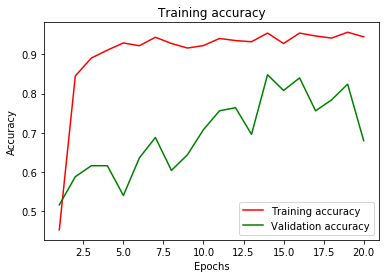

In [34]:
#plotting the accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_accuracy = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='green', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#confusionMatrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [4]:
from tensorflow.keras.models import Sequential
# Build model
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Train
model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

NameError: name 'Convolution2D' is not defined

In [36]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         titles='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arrange(len(casses))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    
    fmt = '.2f' if normalise else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0],cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='whitre' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()  
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [37]:
#compute cm
cnf_matrix = confusion_matrix(y_test,yhat,labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test,y_hat))

plt.figure()
plot_confusion_matrix(cnf_matrix,classes['flair','t1','t2','t1ce'],normalise=False, title='Confusion Matrix')

NameError: name 'y_test' is not defined